# Exploratory Data Analysis

Dataset link : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## Importing required libraries and dataset

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Importing the data
data = pd.read_csv('../data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Shape of the dataset**

In [3]:
data.shape

(569, 33)

In [4]:
print(f"There are {len(data.columns)} features in the dataset")
print(f"There are {len(data)} samples in the dataset")

There are 33 features in the dataset
There are 569 samples in the dataset


## Data checks

* Check for missing values
* Check for duplicate values
* Check for different dataytpes
* Check the number of unique values
* Check the descriptive statistics of the dataset

#### Check for missing values

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There are no missing values in the dataset and let's remove the Unnamed:32 column

In [6]:
data.drop("Unnamed: 32", axis=1, inplace=True)

#### Checking for duplicate values

In [7]:
data.duplicated().sum()

0

There are no duplicate values in our dataset

#### Check the different datatypes in the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There is only one categorical column in our dataset. That is our target column `diagnosis`

#### Check the number of unique values in each column in the dataset

In [9]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

#### Descriptive statistics

In [10]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Insights:**
- The mean radius of tumor is 6.98 to 28.11, with a mean of 14.13
- Tumor textures (grayscale values) have a mean range from about 9.71 to 39.28, with a mean of 19.29.
- Tumor areas range from 143.5 to 2501, with a mean of 654.89.
- Tumors have varying levels of compactness and concavity, as indicated by the compactness_mean and concavity_mean values.
- Some tumors have compactness values as high as 0.3454 and concavity values as high as 0.4268.
- Tumor smoothness (smoothness_mean) has a mean of around 0.096, indicating relatively consistent smoothness across instances.
- Symmetry (symmetry_mean) also varies across tumors with a mean of 0.181, indicating varying levels of symmetry in tumor shapes.

### Feature Engineering

In [11]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
data.drop("id", axis=1, inplace=True)

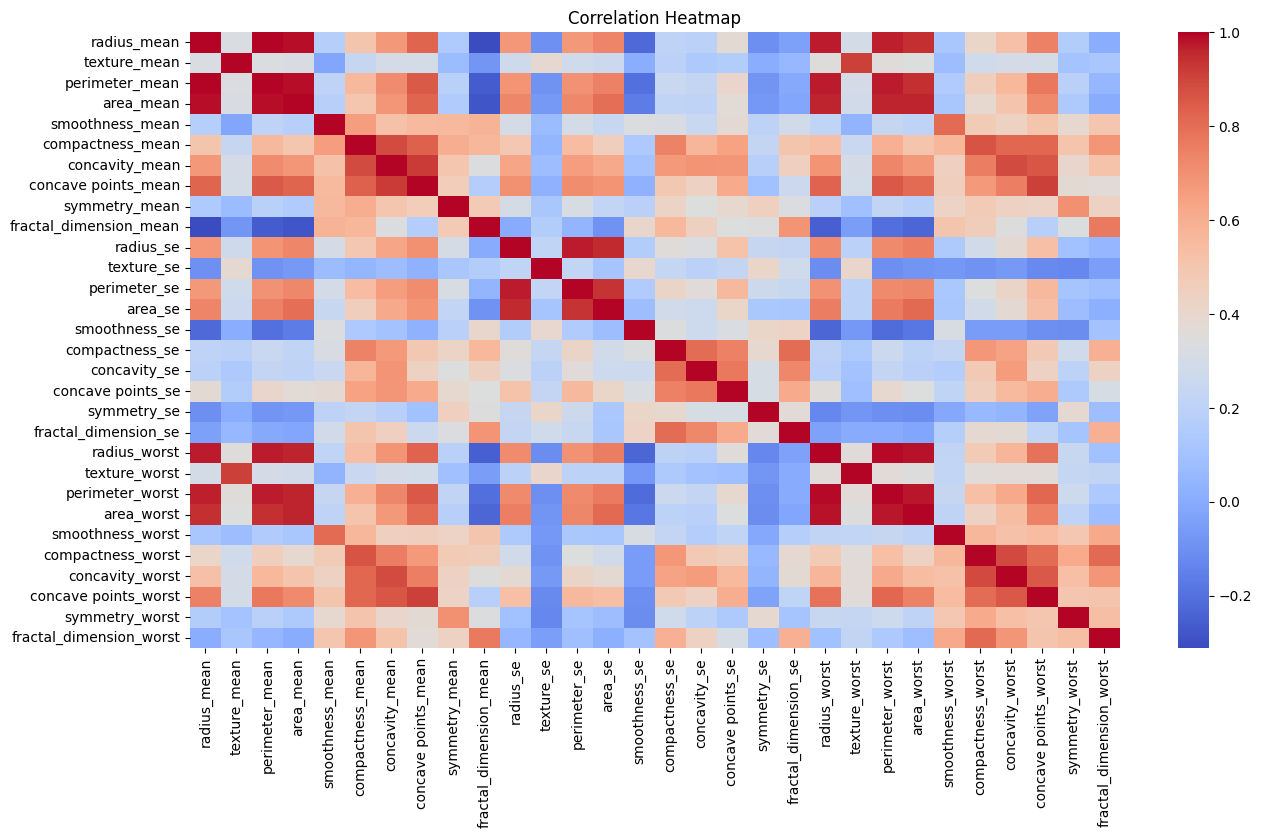

In [13]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Removing highly correlated columns

In [14]:
high_correlation_pairs = []

for i in corr_matrix.index:
    for j in corr_matrix.index:
        if (corr_matrix[i][j] > 0.85) & (i != j) & (j not in high_correlation_pairs):
            high_correlation_pairs.append(j)

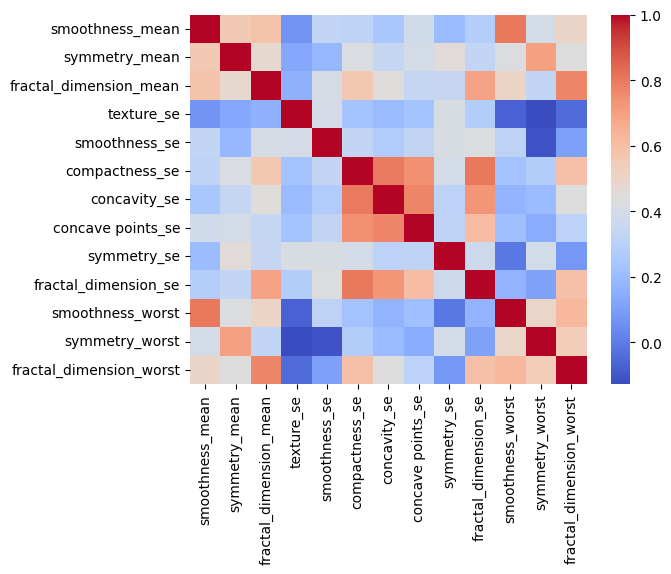

In [15]:
data_cleaned = data.drop(high_correlation_pairs, axis=1)
sns.heatmap(data_cleaned.corr(numeric_only=True), cmap='coolwarm')
plt.show()

## Data Visualization


### Univariate Analysis

#### `diagnosis` feature (target feature)

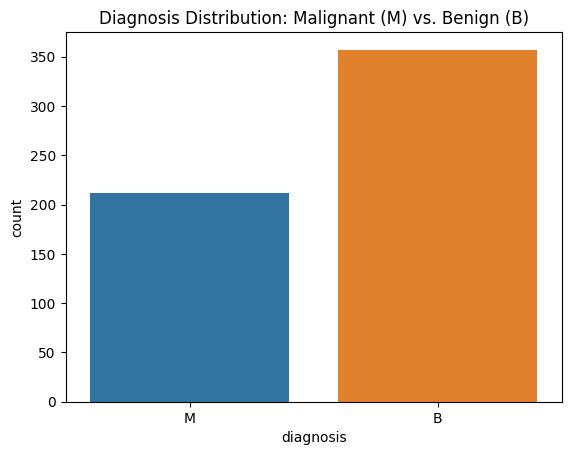

In [16]:
sns.countplot(data=data_cleaned, x="diagnosis")
plt.title("Diagnosis Distribution: Malignant (M) vs. Benign (B)")
plt.show()

As there are many columns in the dataset let's plot 4 columns for analysis

In [17]:
cols = list(data_cleaned.columns)[1:]

#### Univariate Analysis

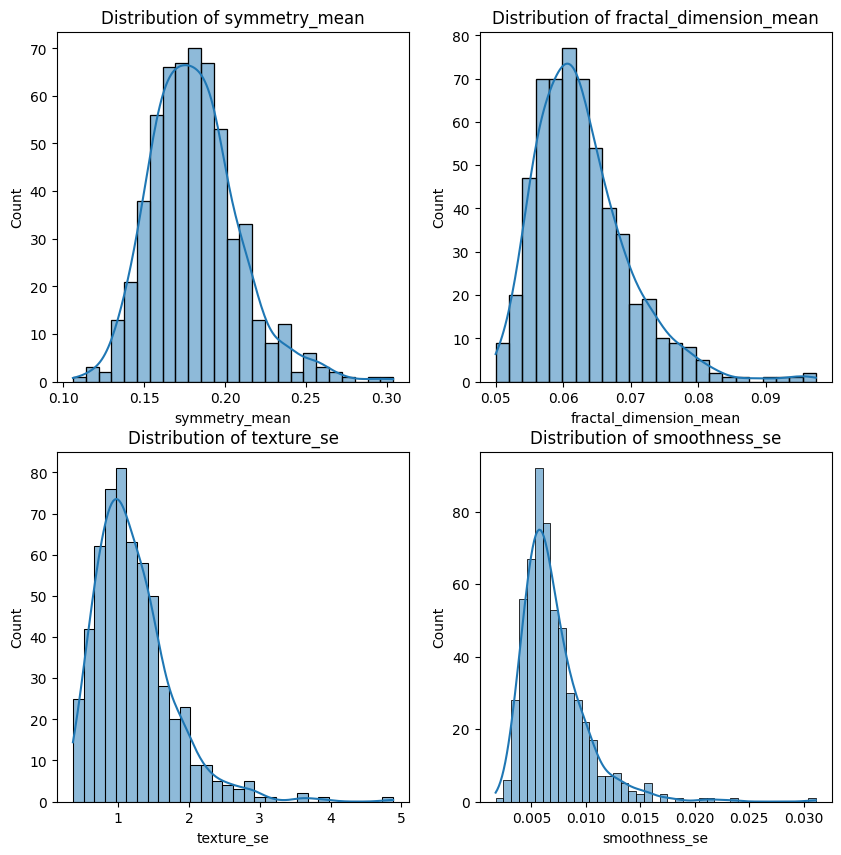

In [18]:
plt.figure(figsize=(10, 10))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.histplot(data=data_cleaned, x=cols[i], kde=True)
    plt.title(f"Distribution of {cols[i]}")
plt.show()

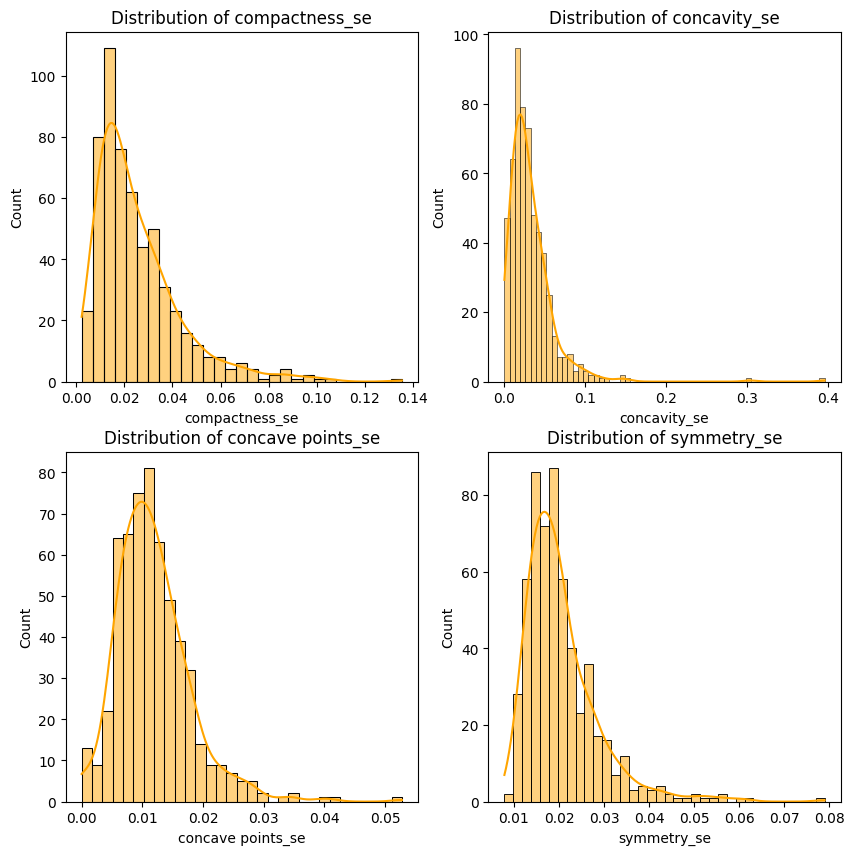

In [19]:
plt.figure(figsize=(10, 10))
for i in range(5, 9):
    plt.subplot(2, 2, i-4)
    sns.histplot(data=data_cleaned, x=cols[i], kde=True, color='orange')
    plt.title(f"Distribution of {cols[i]}")
plt.show()

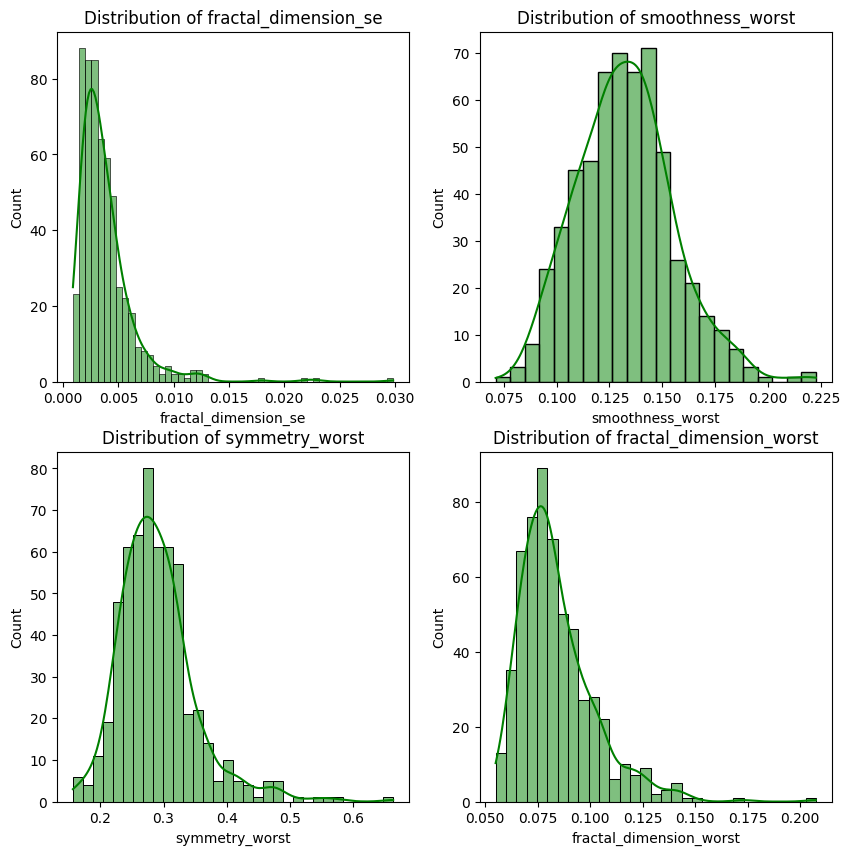

In [20]:
plt.figure(figsize=(10, 10))
for i in range(9, 13):
    plt.subplot(2, 2, i-8)
    sns.histplot(data=data_cleaned, x=cols[i], kde=True, color='g')
    plt.title(f"Distribution of {cols[i]}")
plt.show()

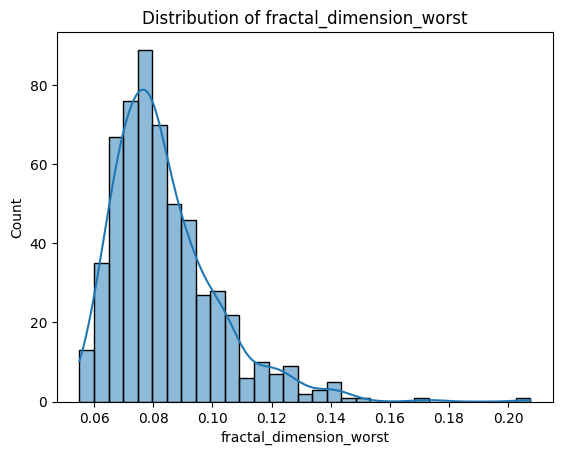

In [21]:
sns.histplot(data=data_cleaned, x=cols[-1], kde=True)
plt.title(f"Distribution of {cols[-1]}")
plt.show()

### Bivariate Analysis

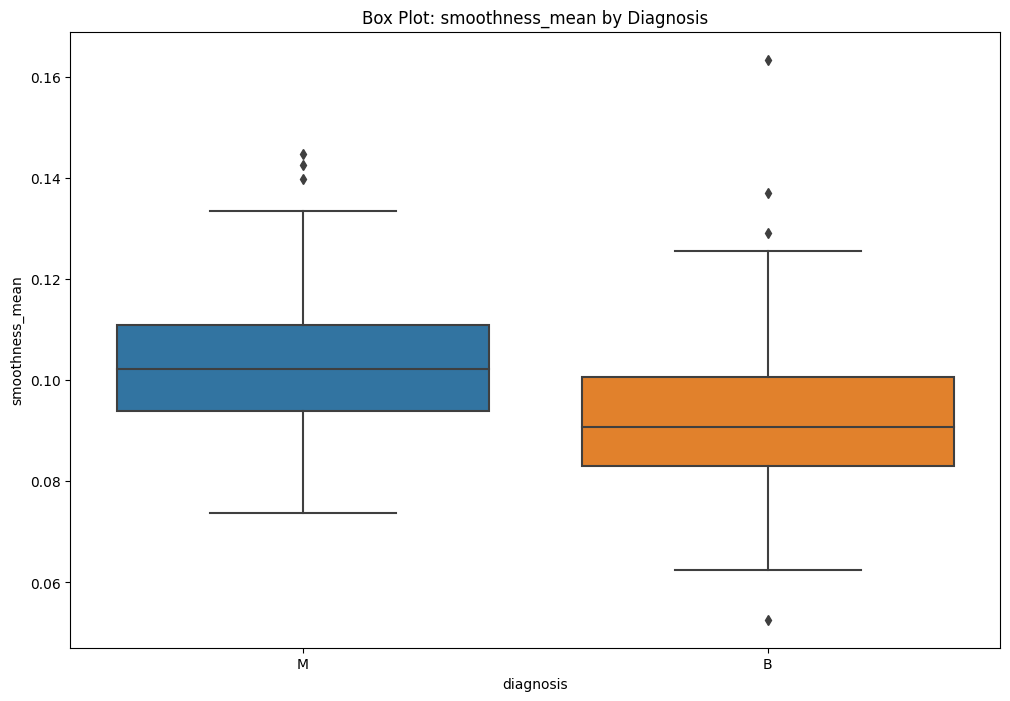

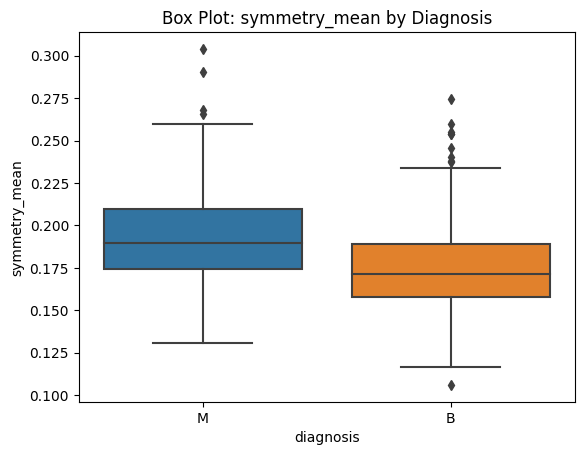

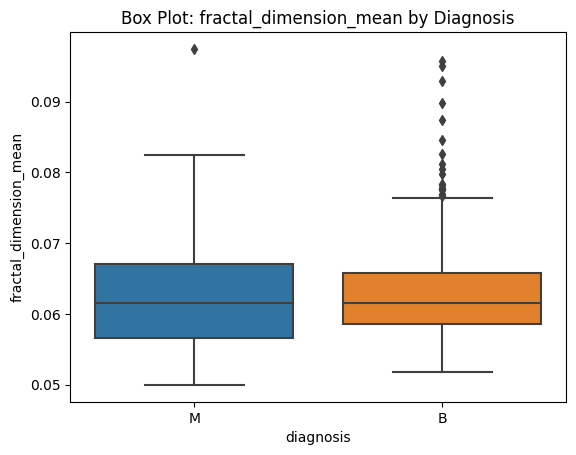

In [22]:
plt.figure(figsize=(12, 8))

for feature in ['smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean']:
    sns.boxplot(data=data, x='diagnosis', y=feature)
    plt.title(f'Box Plot: {feature} by Diagnosis')
    plt.ylabel(feature)
    plt.show()

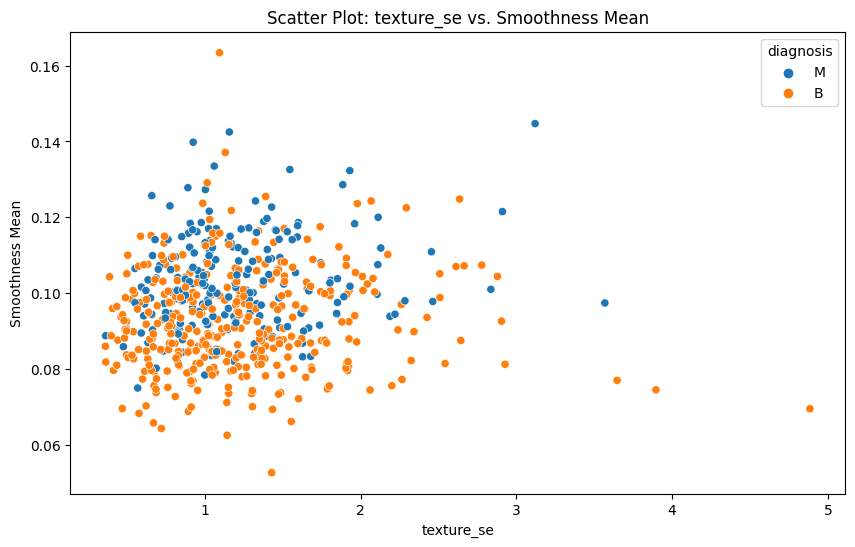

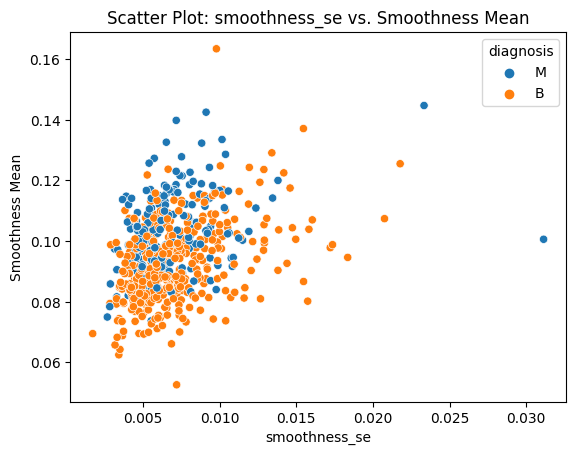

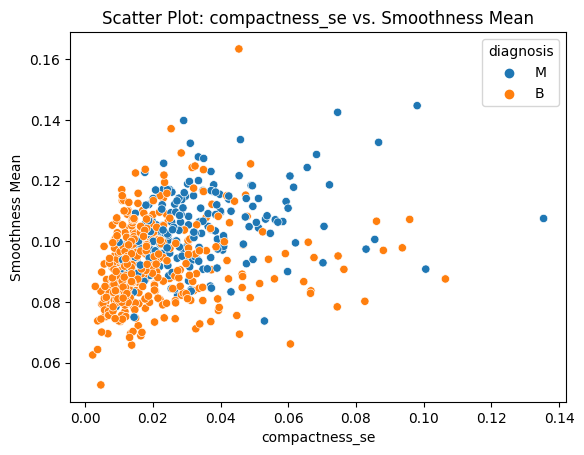

In [23]:
plt.figure(figsize=(10, 6))

for feature in ['texture_se', 'smoothness_se', 'compactness_se']:
    sns.scatterplot(data=data, x=feature, y='smoothness_mean', hue='diagnosis')
    plt.title(f'Scatter Plot: {feature} vs. Smoothness Mean')
    plt.xlabel(feature)
    plt.ylabel('Smoothness Mean')
    plt.show()

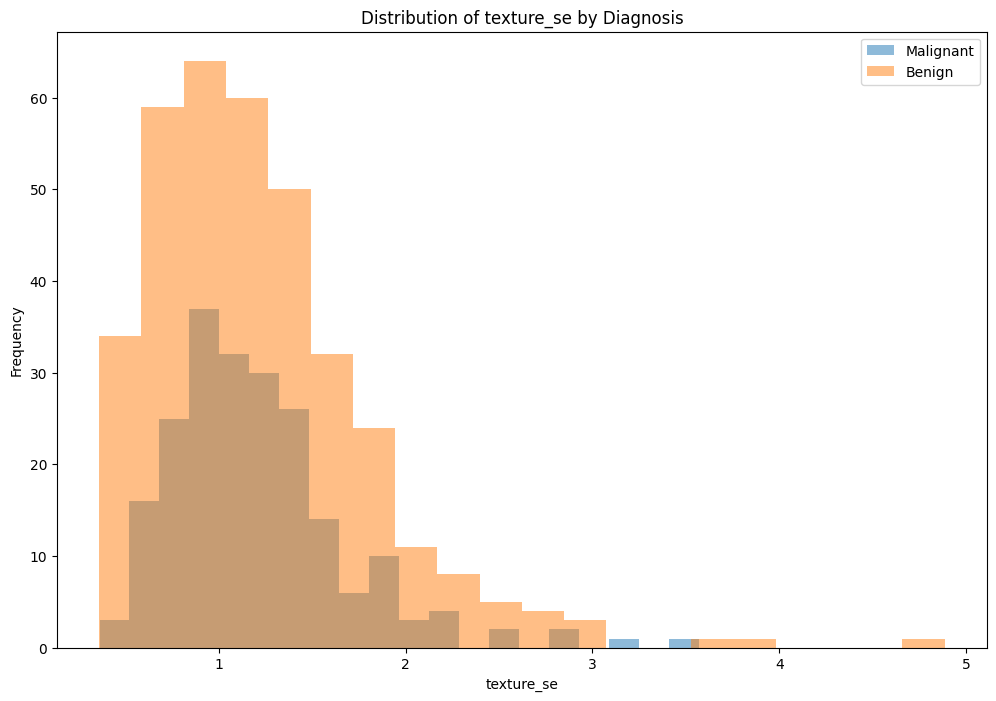

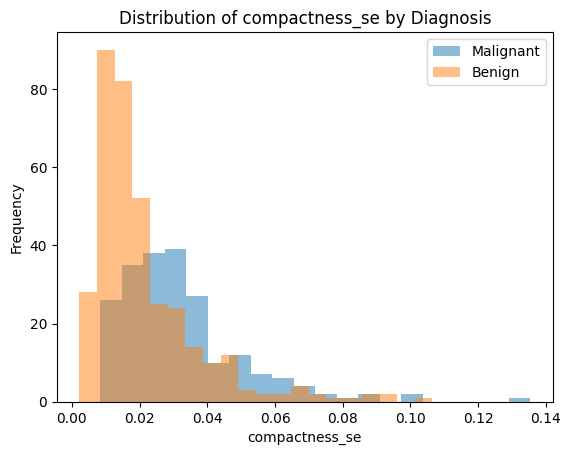

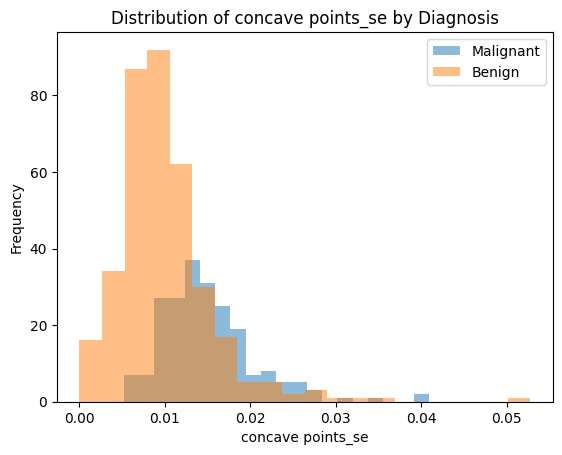

In [24]:
plt.figure(figsize=(12, 8))

for feature in ['texture_se', 'compactness_se', 'concave points_se']:
    plt.hist(data[data['diagnosis'] == 'M'][feature],
             alpha=0.5, label='Malignant', bins=20)
    plt.hist(data[data['diagnosis'] == 'B'][feature],
             alpha=0.5, label='Benign', bins=20)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [25]:
# Saving the cleaned data
data_cleaned.to_csv('../data/data_cleaned.csv', index=False, header=True)